## K-Means Clustering 

###### Importing libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
%matplotlib inline

###### loading data 

In [2]:
data = loadmat('ex7data2.mat')
X = data['X']

###### Defining function for finding closest centroid 

In [3]:
def closestCentroid(X, centroids):
    m = X.shape[0]
    k = centroids.shape[0]
    idx = np.zeros(m)
    
    for i in range(m):
        minDistance = 1000000
        for j in range(k):
            dist = np.sum((X[i,:] - centroids[j,:]) ** 2)
            if dist < minDistance:
                minDistance = dist
                idx[i] = j
    return idx

###### Testing closest centroid 

In [4]:
initCentroids = np.array([[3,3],[6,2],[8,5]])
k = initCentroids.shape[0]
idx = closestCentroid(X, initCentroids)
idx[0:4]

array([0., 2., 1., 0.])

###### Function for random initialization of initialCentroids 

In [5]:
def initializeCentroids(X, k):
    m, n = X.shape
    centroids = np.zeros((k,n))
    idx = np.random.randint(0, m, k)
    print(idx)
    
    for i in range(k):
        centroids[i,:] = X[idx[i], :]
        
    return centroids

###### Testing closest centroid with random initialization 

In [6]:
initCentroids = initializeCentroids(X, k)
idx = closestCentroid(X, initCentroids)
idx[0:4]

[254  11 289]


array([1., 2., 0., 1.])

###### Computing centroid for the cluster 

In [7]:
def computeCentroids(X, idx, k):
    m,n = X.shape
    centroids = np.zeros((k,n))
    
    for i in range(k):
        indices = np.where(idx == i)
        centroids[i,:] = (np.sum(X[indices,:], axis = 1) / len(indices[0])).ravel()
        
    return centroids

computeCentroids(X, idx, 3)

array([[6.75348625, 2.96344945],
       [1.92925435, 4.29331087],
       [4.24006439, 1.8422144 ]])

###### Running K-means 

In [8]:
def Kmeans(X, initCentroids, maxIters):
    m, n = X.shape
    k = initCentroids.shape[0]
    idx = np.zeros(m)
    centroids = initCentroids
    
    for i in range(maxIters):
        idx = closestCentroid(X, centroids)
        centroids = computeCentroids(X, idx, k)
        
    return idx, centroids

idx, centroids = Kmeans(X, initCentroids, 100)
idx, centroids

(array([1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 

###### Plotting the result 

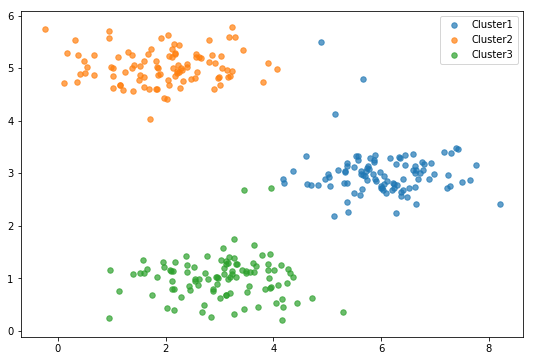

In [9]:
cluster1 = X[np.where(idx == 0)[0],:]
cluster2 = X[np.where(idx == 1)[0],:]
cluster3 = X[np.where(idx == 2)[0],:]

fig, ax = plt.subplots(figsize = (9,6))
ax.scatter(cluster1[:,0], cluster1[:,1], s= 30, alpha = 0.7, label = 'Cluster1')
ax.scatter(cluster2[:,0], cluster2[:,1], s= 30, alpha = 0.7, label = 'Cluster2')
ax.scatter(cluster3[:,0], cluster3[:,1], s= 30, alpha = 0.7, label = 'Cluster3')
ax.legend()

# Applying K-Means to Image Compression 

In [10]:
imagedata = loadmat('bird_small.mat')
imagedata

{'A': array([[[219, 180, 103],
         [230, 185, 116],
         [226, 186, 110],
         ...,
         [ 14,  15,  13],
         [ 13,  15,  12],
         [ 12,  14,  12]],
 
        [[230, 193, 119],
         [224, 192, 120],
         [226, 192, 124],
         ...,
         [ 16,  16,  13],
         [ 14,  15,  10],
         [ 11,  14,   9]],
 
        [[228, 191, 123],
         [228, 191, 121],
         [220, 185, 118],
         ...,
         [ 14,  16,  13],
         [ 13,  13,  11],
         [ 11,  15,  10]],
 
        ...,
 
        [[ 15,  18,  16],
         [ 18,  21,  18],
         [ 18,  19,  16],
         ...,
         [ 81,  45,  45],
         [ 70,  43,  35],
         [ 72,  51,  43]],
 
        [[ 16,  17,  17],
         [ 17,  18,  19],
         [ 20,  19,  20],
         ...,
         [ 80,  38,  40],
         [ 68,  39,  40],
         [ 59,  43,  42]],
 
        [[ 15,  19,  19],
         [ 20,  20,  18],
         [ 18,  19,  17],
         ...,
         [ 65,  43,  39

In [11]:
A = imagedata['A']
A.shape

(128, 128, 3)

###### Preprocessing the data and feeding to K-means for compression 

[ 1698 12701  9026 10872   313 14573  1644 12416  5356]


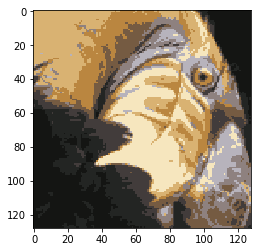

In [12]:
A = A / 255.  # normalize values

# Reshape the array
X = np.reshape(A, (A.shape[0] * A.shape[1], A.shape[2]))

# random-initialization of centroids
initialCentroids = initializeCentroids(X, 9) # second parameter should be the colors we want to be in pic

idx, centroids = Kmeans(X, initialCentroids, 10)

# get closest centroids one last time
idx = closestCentroid(X, centroids)

# mapping each pixel to centroid value
newX = centroids[idx.astype(int), :]

# reshape to original size
newX = np.reshape(newX, (A.shape[0], A.shape[1], A.shape[2]))

plt.imshow(newX)